In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_healthy = pd.read_csv(r"E:\Data\积水潭患者数据集\w6s1\healthy\w6s1_healthy_bicps_br.csv", header=[0, 1], index_col=0)
df_affected = pd.read_csv(r"E:\Data\积水潭患者数据集\w6s1\affected\w6s1_affected_bicps_br.csv", header=[0, 1], index_col=0)

In [3]:
# 提取特定的一块肌肉
df_healthy_oneCH = df_healthy['agonist_ch1'][['label(kg)', 'FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq']]
df_affected_oneCH = df_affected['agonist_ch1'][['label(kg)', 'FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq']]

# 进一步提取某一个重量
df_healthy_2test = df_healthy_oneCH[(df_healthy_oneCH['label(kg)'] == 2)]
df_affected_2test = df_affected_oneCH[(df_affected_oneCH['label(kg)'] == 2)]

# 
df_healthy_2test.head

<bound method NDFrame.head of     label(kg)  FMG_increase       mav       rms  wave_length  zero_crossing  \
21        2.0      0.140059 -0.432563 -0.466701     0.009928       0.773678   
22        2.0      0.143846  0.098446  0.090148     0.286613       0.063824   
23        2.0      0.133259  0.141712  0.180039     0.324874       0.077784   
24        2.0      0.152695  0.353480  0.252597     0.277113      -0.078798   
25        2.0      0.164087  0.333296  0.207860     0.399589      -0.078844   
26        2.0      0.181189  0.324371  0.555216     0.412006       0.077235   
27        2.0      0.184861  1.066586  1.059913     0.356672      -0.333288   

    slope_sign_change  mean_freq  mean_power_freq  
21           0.071239  31.490395        52.416700  
22          -0.028982  38.357663        56.474745  
23          -0.031126  32.150454        49.334684  
24          -0.061139  23.308829        40.324214  
25          -0.055863  28.617975        49.032474  
26          -0.016186  23

In [ ]:
"""
检验数据是否符合正态分布
"""

In [4]:
# 对两个DataFrame的每一列分别计算显著性差异
result_p = {}
result_t = {}
for column in df_healthy_2test.columns:
    # 检查方差齐性，P值>>0.05具有方差齐性
    levene_statistic, levene_p_value = stats.levene(df_healthy_2test[column], df_affected_2test[column])
    # 具有方差齐性，直接检验，不具有方差齐性，equal_var = False
    if levene_p_value > 0.05:
        t_stat, p_value = stats.ttest_ind(df_healthy_2test[column], df_affected_2test[column])
    else:
        t_stat, p_value = stats.ttest_ind(df_healthy_2test[column], df_affected_2test[column], equal_var = False)
        print(f"{column}不具有方差齐性")
        pass

    result_t[column] = t_stat
    result_p[column] = p_value
    pass

# P>0.05不具有显著性，P<0.05具有显著性
print(result_p)
print(result_t)

label(kg)不具有方差齐性
{'label(kg)': nan, 'FMG_increase': 0.00014457824901210176, 'mav': 0.0485512475634523, 'rms': 0.17733938302684313, 'wave_length': 0.8509938454026724, 'zero_crossing': 0.0006346385975775088, 'slope_sign_change': 1.2458545185920062e-05, 'mean_freq': 0.2769308218123332, 'mean_power_freq': 0.0914621691412843}
{'label(kg)': nan, 'FMG_increase': -5.297144279352306, 'mav': -2.1764355939654103, 'rms': -1.4263491765328595, 'wave_length': 0.19162858593717197, 'zero_crossing': 4.466893661731547, 'slope_sign_change': 6.808726891746761, 'mean_freq': -1.1348481585741297, 'mean_power_freq': 1.8224480163121333}


e:\anaconda\install\lib\site-packages\scipy\stats\_morestats.py:2710: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
C:\Users\WeimyMark\AppData\Local\Temp\ipykernel_3524\358405909.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(df_healthy_2test[column], df_affected_2test[column], equal_var = False)


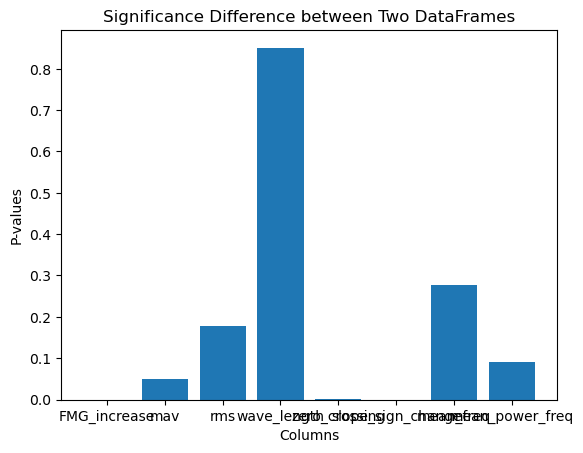

In [5]:
fig, ax = plt.subplots()
ax.bar(result_p.keys(), result_p.values())
ax.set_xlabel('Columns')
ax.set_ylabel('P-values')
ax.set_title('Significance Difference between Two DataFrames')
plt.show()

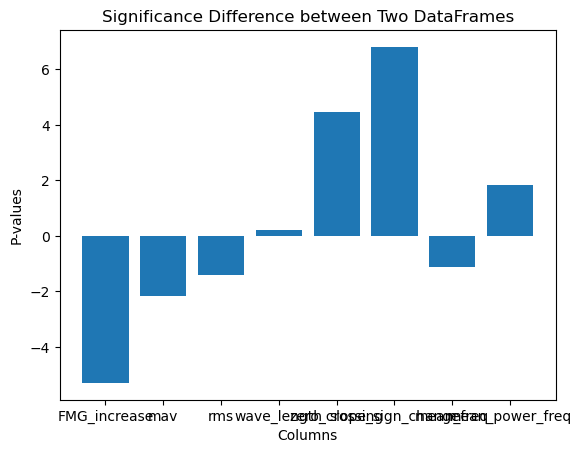

In [6]:
fig, ax = plt.subplots()
ax.bar(result_t.keys(), result_t.values())
ax.set_xlabel('Columns')
ax.set_ylabel('P-values')
ax.set_title('Significance Difference between Two DataFrames')
plt.show()